In [16]:
import numpy as np
import py

from py.simulation import *
from py.estimation import *
from py.features import *
from py.utils import *
from py.prep_data import *
from importlib import reload

from matplotlib import pyplot as plt

In [22]:
data_dir = 'data/PhD Exchange Network Data/'

top_n = 70
t_start = 13
lam = 0.82

T, labels, timesteps = prep_math_phd(data_dir, top_n = top_n)
T, timesteps, A0, n_obs = initial_condition(T, timesteps, t_start)

A = state_matrix(T, A0 = A0, lam = lam)

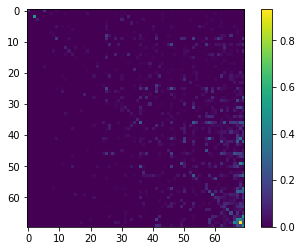

In [27]:
i = -1
plt.imshow(matrix_sort(A[i], GAMMA[i]))
plt.colorbar()

In [24]:
grid = 21
M = np.zeros((grid, grid))

X = np.linspace(beta[0] - 4, beta[0] + 4, grid)
Y = np.linspace(beta[1] - 4, beta[1] + 4, grid)
x, y = np.meshgrid(X, Y)
for i in range(grid):
    for j in range(grid):
        M[i,j] = ll(T, S, beta = np.array([x[i,j], y[i,j]]))

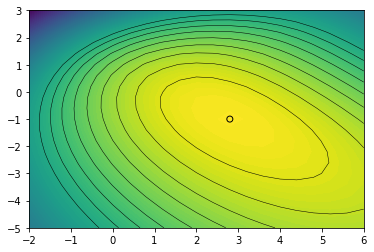

In [25]:
plt.contourf(x, y, M, levels = 100)

plt.contour(x, y, M, 
            levels = np.linspace(M.max() - 10000, M.max(), 10),
               linewidths = .5, 
               colors = 'black', 
               linestyles = 'solid')

ix = np.where(M == M.max())
plt.scatter(X[ix[1]], Y[ix[0]], color = 'black', facecolor='none')
# plt.colorbar()

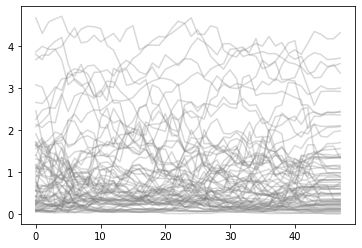

In [28]:
beta_hat = np.array([X[ix[1][0]],Y[ix[0]][0] ]) # this beta is just a guess

S = SR_quadratic_feature(A)

GAMMA = softmax(S, beta_hat).sum(axis = 1)

# GAMMA = np.sort(GAMMA, axis = 1)
p = plt.plot(GAMMA, color = 'grey', alpha = .3)

So, the results of estimation in this case seem wrong, since if we condition on $\beta_0 = 0$ we should get $\beta_1 \approx 2.3$ for consistency with the previous math PhD results. So, we should look for a bug, I'm imagining in the evaluation of the log likelihood? Possibly with feature processing. 